In [31]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown 17zOSK5GUgeXaxLuKgeTBpUm6sTI7dJAd

In [10]:
# Unzip Dataset

import zipfile

zip_ref = zipfile.ZipFile('Network_intrusion.zip')
zip_ref.extractall()
zip_ref.close()

In [11]:
# Converting Train and Test Data into Pandas DataFrame

train_data = pd.read_csv('Train_data.csv')

test_data = pd.read_csv('Test_data.csv')

In [12]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [13]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [14]:
# Checking length of both DataFrame

len(train_data), len(test_data)

(25192, 22544)

## Data Preprocessing

In [15]:
# Checking for missing values

train_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [16]:
test_data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
# Checking target column

train_data['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [18]:
# Checking for non-numerical values

train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [19]:
# Converting all non-numerical columns to  numerical

train_data['protocol_type'] = train_data['protocol_type'].astype('category').cat.codes
train_data['service'] = train_data['service'].astype('category').cat.codes
train_data['flag'] = train_data['flag'].astype('category').cat.codes
train_data['class'] = train_data['class'].astype('category').cat.codes

In [20]:
# Rechecking for non-numerical columns

train_data.dtypes

duration                         int64
protocol_type                     int8
service                           int8
flag                              int8
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## Data Visualization

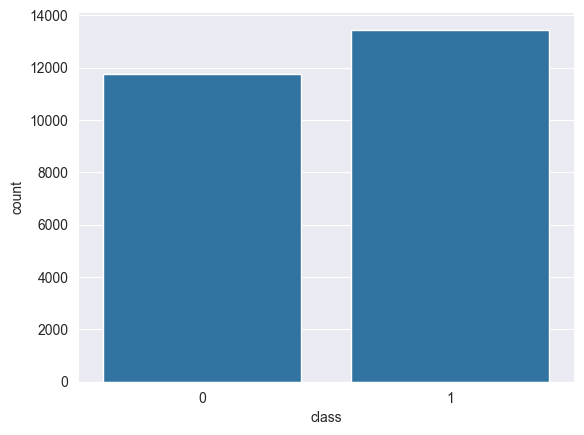

In [21]:
# Plotting Value Counts

sns.countplot(x='class', data=train_data);

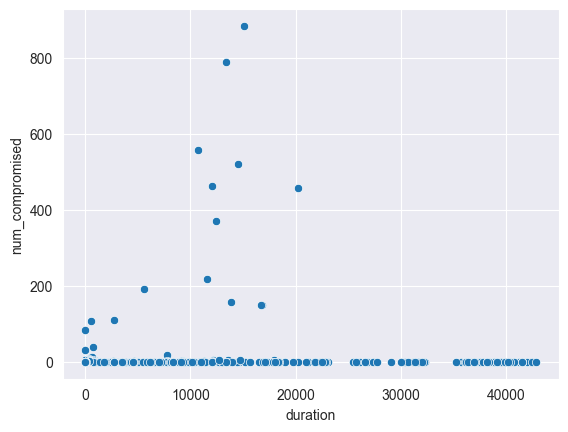

In [22]:
# Plotting duration & num_compromised

sns.scatterplot(x='duration', y='num_compromised', data=train_data);

In [23]:
# Splitting test and train data

x = train_data.drop('class', axis=1)
y = train_data['class']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

x_train.shape, x_test.shape, y_train.shape, x_test.shape

((20153, 41), (5039, 41), (20153,), (5039, 41))

### Modelling

In [25]:
# Building a LinearRegression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.845423275337086

In [26]:
# Building a Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.5572534232982734

In [27]:
# Building a knn model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9894820400873189

### Building an Ensemble Model

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Define base models
base_models = [
    ('Linear Regression', LinearRegression()),
    ('Knn', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
]

# Define meta-model
meta_model = LogisticRegression()

# Create Stacking Classifier
ensemble_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3, n_jobs=-1)

# Training ensemble model
ensemble_model.fit(x_train, y_train)

# Predict on test data
ensemble_pred = ensemble_model.predict(x_test)

# Evaluating the ensemble model
print("Ensemble Model Accuracy:", ensemble_model.score(x_test, y_test))
print("Ensemble Model Classification Report: \n", classification_report(y_test, ensemble_pred))

Ensemble Model Accuracy: 0.9914665608255606
Ensemble Model Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



## Model Evaluation

[[2340   25]
 [  18 2656]]


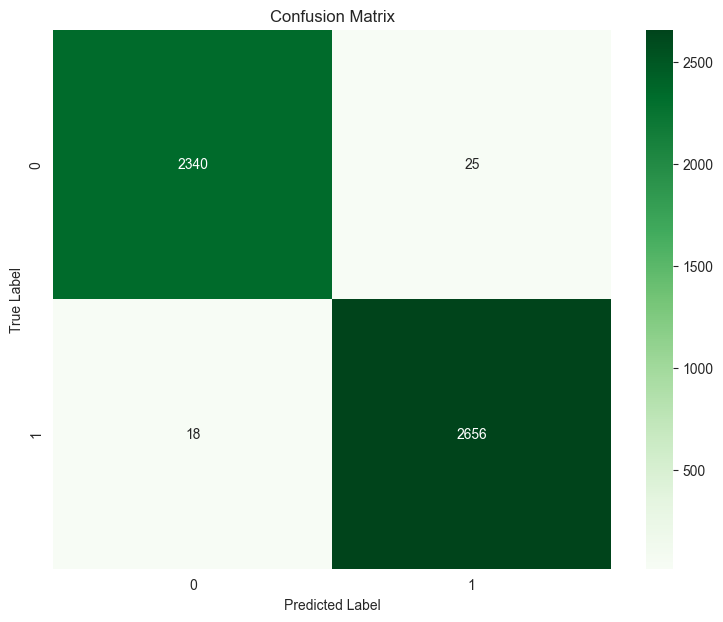

In [29]:
# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, ensemble_pred))

import seaborn as sns

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ensemble_pred)

 # Plotting a confusion matrix
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show();

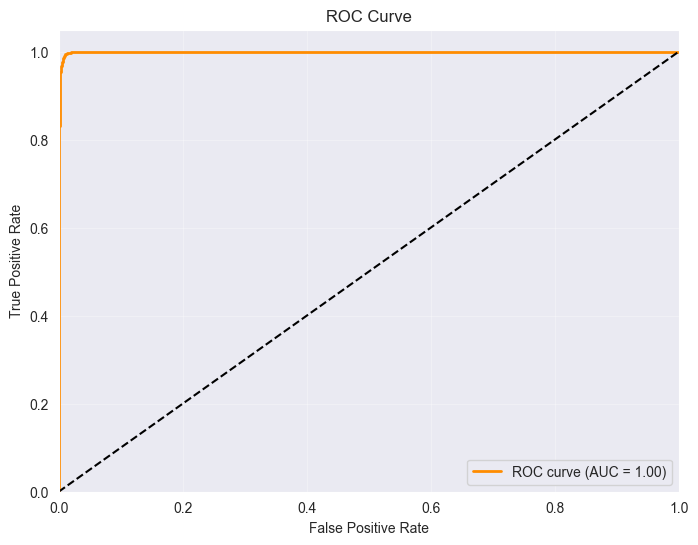

In [30]:
# Plotting ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get predicted probabilities for ROC curve
# If your model supports predict_proba (which StackingClassifier does):
ensemble_proba = ensemble_model.predict_proba(x_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))

# For binary classification (assuming 2 classes)
if len(ensemble_model.classes_) == 2:
    # Binary classification case
    fpr, tpr, _ = roc_curve(y_test, ensemble_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
else:
    # Multi-class classification case
    for i, class_name in enumerate(ensemble_model.classes_):
        fpr, tpr, _ = roc_curve(y_test == class_name, ensemble_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {class_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show();
